In [109]:
import json
import numpy as np
import pandas as pd
import parse_data.prepare_data as prepare_data
import globals
import scipy
import math
from parse_data import preprocess

In [ ]:
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis/Json_data'
json_filenames = ['2024-09-13_11-31-00_YansuJerrySocial.json']
#'2024-09-27_14-25-20_SaraEmilySocial.json', '2024-11-20_15-16-21_SunnyVinceSocial.json', '2024-11-19_14-24-49_AmyXinyuanSocial.json', '2024-11-19_15-22-56_SophiaHocineSocial.json', '2024-11-20_14-17-44_JasonRahulSocial.json', ]

df, trial_list = prepare_data.prepare_data(data_folder, json_filenames)
df1, trial_list1 = prepare_data.prepare_data(data_folder, ['2024-09-27_14-25-20_SaraEmilySocial.json'])
df2, trial_list2 = prepare_data.prepare_data(data_folder, ['2024-11-20_15-16-21_SunnyVinceSocial.json'])
df3, trial_list3 = prepare_data.prepare_data(data_folder, ['2024-11-19_14-24-49_AmyXinyuanSocial.json'])
df4, trial_list4 = prepare_data.prepare_data(data_folder, ['2024-11-19_15-22-56_SophiaHocineSocial.json'])
df5, trial_list5 = prepare_data.prepare_data(data_folder, ['2024-11-20_14-17-44_JasonRahulSocial.json'])

df6, trial_list6 = prepare_data.prepare_data(data_folder, ['2024-10-17_14-28-40_ShamirAbigailSocial.json'])
df7, trial_list7 = prepare_data.prepare_data(data_folder, ['2024-10-17_16-41-38_ZimoElsaSocial.json'])
df8, trial_list8 = prepare_data.prepare_data(data_folder, ['2024-11-12_13-31-14_KhadijaWendySocial.json'])
df9, trial_list9 = prepare_data.prepare_data(data_folder, ['2024-11-12_15-23-24_FrancescaSenSzeSocial.json'])
df10, trial_list10 = prepare_data.prepare_data(data_folder, ['2024-11-13_14-18-54_NasiaRyanSocial.json'])
df11, trial_list11 = prepare_data.prepare_data(data_folder, ['2024-11-13_15-28-07_YichuanHoiSocial.json'])



In [ ]:
#Total score against number of trials won

#Retrieve total score
#score at the end of the session, i.e., score at the last trial end (how do I index this)

def assign_player_scores(trial_list, trial_index, i):

   #Unsure which to use
    
   this_trial = trial_list[trial_index]

   trial_end = this_trial[this_trial['eventDescription'] == globals.TRIAL_END]
    
   #if trial_end.empty:
        #print(f"No 'TRIAL_END' event in trial {trial_index} of dataset.")
        #print(this_trial.head())  # Print the first few rows of the trial for inspection
    
   trial_end_idx = trial_end.index[0]
   trial_end_idx = int(trial_end_idx - this_trial.index[0])

   player_score = trial_end[globals.PLAYER_SCORE_DICT[i]['score']].item()
    
   return player_score
 

In [126]:
def get_final_score(trial_list, i, fallback_to_second_last=True):
    
    try:
        final_trial_scores = assign_player_scores(trial_list, -1, i)
        
        if final_trial_scores is None and fallback_to_second_last:
            print(f"No 'TRIAL_END'")
            final_trial_scores = assign_player_scores(trial_list, -2, i)
        
        return final_trial_scores
    except Exception as e:
        print(f"Error encountered: {e}")
        return None 



In [ ]:
def get_winners(trial_list, player=None):

   trial_winners = {}

   for trial_index in range(len(trial_list)):
       this_trial = trial_list[trial_index]
       
       slice_onset_event = this_trial[this_trial['eventDescription'] == globals.SLICE_ONSET]
       
       trigger_event = this_trial[this_trial['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]
       
       winner = int(trigger_event[globals.TRIGGER_CLIENT].item())
       
       trial_winners[trial_index] = winner
    
   if player is not None:
        
       player_wins = sum(1 for winner in trial_winners.values() if winner == player)
       return player_wins

   return trial_winners


In [ ]:
#TEST
trial_winners = get_winners(trial_list, player = 1)
print(trial_winners)


In [18]:
import matplotlib.pyplot as plt
import numpy as np

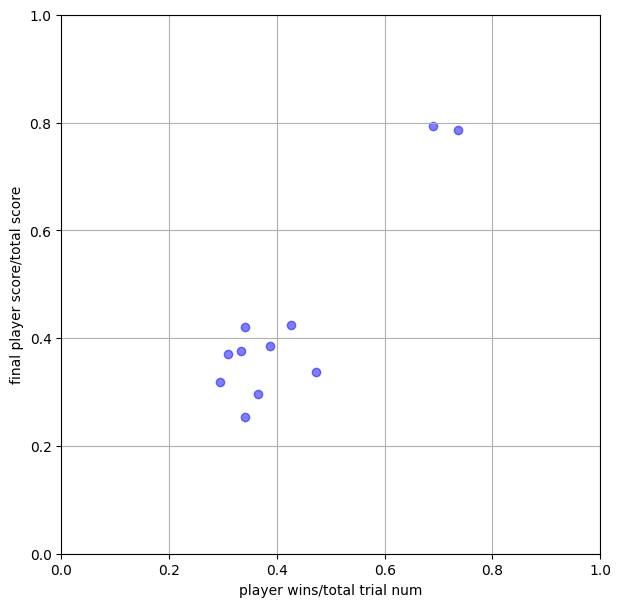

In [137]:
plt.figure(figsize=(14,7))

P0_wins = get_winners(trial_list, player=0)
P0_wins1 = get_winners(trial_list1, player=0)
P0_wins2 = get_winners(trial_list2, player=0)
P0_wins3 = get_winners(trial_list3, player=0)
P0_wins4 = get_winners(trial_list4, player=0)
P0_wins5 = get_winners(trial_list5, player=0)
P0_wins6 = get_winners(trial_list6, player=0)
P0_wins7 = get_winners(trial_list7, player=0)
P0_wins8 = get_winners(trial_list8, player=0)
P0_wins9 = get_winners(trial_list9, player=0)
#P0_wins10 = get_winners(trial_list10, player=0)
P0_wins11 = get_winners(trial_list11, player=0)


num_trials = len(trial_list)

win_prop_P0 = P0_wins/num_trials
win_prop_P01 = P0_wins1/num_trials
win_prop_P02 = P0_wins2/num_trials
win_prop_P03 = P0_wins3/num_trials
win_prop_P04 = P0_wins4/num_trials
win_prop_P05 = P0_wins5/num_trials
win_prop_P06 = P0_wins6/num_trials
win_prop_P07 = P0_wins7/num_trials
win_prop_P08 = P0_wins8/num_trials
win_prop_P09 = P0_wins9/num_trials
#win_prop_P010 = P0_wins4/num_trials
win_prop_P011 = P0_wins11/num_trials


P0_score = assign_player_scores(trial_list, -1, 0)
P0_score1 = assign_player_scores(trial_list1, -3, 0)
P0_score2 = assign_player_scores(trial_list2, -1, 0)
P0_score3 = assign_player_scores(trial_list3, -2, 0)
P0_score4 = assign_player_scores(trial_list4, -1, 0)
P0_score5 = assign_player_scores(trial_list5, -3, 0)
P0_score6 = assign_player_scores(trial_list6, -1, 0)
P0_score7 = assign_player_scores(trial_list7, -2, 0)
P0_score8 = assign_player_scores(trial_list8, -1, 0)
P0_score9 = assign_player_scores(trial_list9, -1, 0)
#P0_score10 = assign_player_scores(trial_list10, -1, 0)
P0_score11 = assign_player_scores(trial_list11, -1, 0)

P1_score = assign_player_scores(trial_list, -1,1)
P1_score1 = assign_player_scores(trial_list1, -3, 1)
P1_score2 = assign_player_scores(trial_list2, -1, 1)
P1_score3 = assign_player_scores(trial_list3, -2, 1)
P1_score4 = assign_player_scores(trial_list4, -1, 1)
P1_score5 = assign_player_scores(trial_list5, -3, 1)
P1_score6 = assign_player_scores(trial_list6, -1, 1)
P1_score7 = assign_player_scores(trial_list7, -2, 1)
P1_score8 = assign_player_scores(trial_list8, -1, 1)
P1_score9 = assign_player_scores(trial_list9, -1, 1)
#P1_score10 = assign_player_scores(trial_list10, -1, 1)
P1_score11 = assign_player_scores(trial_list11, -1, 1)

total_score = P0_score + P1_score
total_score1 = P0_score1 + P1_score1
total_score2 = P0_score2 + P1_score2
total_score3 = P0_score3 + P1_score3
total_score4 = P0_score4 + P1_score4
total_score5 = P0_score5 + P1_score5
total_score6 = P0_score6 + P1_score6
total_score7 = P0_score7 + P1_score7
total_score8 = P0_score8 + P1_score8
total_score9 = P0_score9 + P1_score9
#total_score10 = P0_score10 + P1_score10
total_score11 = P0_score11 + P1_score11

prop_score_P0 = P0_score/total_score
prop_score_P01 = P0_score1/total_score1
prop_score_P02 = P0_score2/total_score2
prop_score_P03 = P0_score3/total_score3
prop_score_P04 = P0_score4/total_score4
prop_score_P05 = P0_score5/total_score5
prop_score_P06 = P0_score6/total_score6
prop_score_P07 = P0_score7/total_score7
prop_score_P08 = P0_score8/total_score8
prop_score_P09 = P0_score9/total_score9
#prop_score_P010 = P0_score10/total_score10
prop_score_P011 = P0_score11/total_score11


plt.scatter(win_prop_P0, prop_score_P0, color='blue', alpha=0.5)
plt.scatter(win_prop_P01, prop_score_P01, color='blue', alpha=0.5)
plt.scatter(win_prop_P02, prop_score_P02, color='blue', alpha=0.5)
plt.scatter(win_prop_P03, prop_score_P03, color='blue', alpha=0.5)
plt.scatter(win_prop_P04, prop_score_P04, color='blue', alpha=0.5)
plt.scatter(win_prop_P05, prop_score_P05, color='blue', alpha=0.5)
plt.scatter(win_prop_P06, prop_score_P06, color='blue', alpha=0.5)
plt.scatter(win_prop_P07, prop_score_P07, color='blue', alpha=0.5)
plt.scatter(win_prop_P08, prop_score_P08, color='blue', alpha=0.5)
plt.scatter(win_prop_P09, prop_score_P09, color='blue', alpha=0.5)
plt.scatter(win_prop_P011, prop_score_P011, color='blue', alpha=0.5)

plt.gca().set_aspect(1)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('player wins/total trial num')
plt.ylabel('final player score/total score')
plt.grid(True)
plt.show()

In [ ]:
def plot_multiple_datasets(data_folder, json_filenames):

    plt.figure(figsize=(14, 7))

    for json_filename in json_filenames:
        
        df, trial_list = prepare_data.prepare_data(data_folder, [json_filename])

####
plot_multiple_datasets(data_folder, json_filenames)

    
        
